#  20 Years of Games

Tutorial is based on https://www.dataquest.io/blog/pandas-python-tutorial

Author: yvesbeutler
Date: 13-02-2019


In [14]:
import numpy as np
import pandas as pd

# used to check ifNaN()
import math

reviews = pd.read_csv("../../data/ign.csv")

In [15]:
# remove first unwanted column
reviews = reviews.loc[:,"score_phrase":] # better than reviews.iloc[:,1:]

reviews.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [16]:
some_reviews = reviews.iloc[10:20,]
some_reviews.head()

# info: some_reviews.loc[9:21,:] doesn't throw an error as expected

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
10,Good,Tekken Tag Tournament 2,/games/tekken-tag-tournament-2/ps3-124584,PlayStation 3,7.5,Fighting,N,2012,9,11
11,Good,Tekken Tag Tournament 2,/games/tekken-tag-tournament-2/xbox-360-124581,Xbox 360,7.5,Fighting,N,2012,9,11
12,Good,Wild Blood,/games/wild-blood/iphone-139363,iPhone,7.0,NaN,N,2012,9,10
13,Amazing,Mark of the Ninja,/games/mark-of-the-ninja-135615/xbox-360-129276,Xbox 360,9.0,"Action, Adventure",Y,2012,9,7
14,Amazing,Mark of the Ninja,/games/mark-of-the-ninja-135615/pc-143761,PC,9.0,"Action, Adventure",Y,2012,9,7


In [73]:
# create a DataFrame out of three Series


s1 = pd.Series([5371, 'Yves Beutler', 'Junior']).
s2 = pd.Series([4365, 'Natalie Kuster', 'Lead']).to_frame()
s3 = pd.Series([1925, 'Fabio Vivian', 'Professional']).to_frame()

x = [s1, s2, s3]
df = pd.DataFrame(x,columns=['id', 'nameds', 'experience'])
# why can't I rename my cols..? :-(

df

ValueError: Shape of passed values is (3, 1), indices imply (3, 3)

In [76]:
# get the mean score of all games
reviews['score'].mean()

# get the means of all numerical columns
reviews.mean()

score               6.950459
release_year     2006.515329
release_month       7.138470
release_day        15.603866
dtype: float64

### Statistical Correlation

As a rule of thumb, the following guidelines on strength of relationship are often useful (though many experts would somewhat disagree on the choice of boundaries).

| Value of r                 | Strength of relationship |
|----------------------------|--------------------------|
| -1.0 to -0.5 or 1.0 to 0.5 | Strong                   |
| -0.5 to -0.3 or 0.5 to 0.3 | Moderate                 |
| -0.3 to -0.1 or 0.3 to 0.1 | Weak                     |
| -0.1 to 0.1                | None or very weak        |

Correlation is only appropriate for examining the relationship between meaningful quantifiable data (e.g. air pressure, temperature) rather than categorical data such as gender, color etc.

In [19]:
# check correlation of our attributes
reviews.corr()

,score,release_year,release_month,release_day
score,1.000000,0.062716,0.007632,0.020079
release_year,0.062716,1.000000,-0.115515,0.016867
release_month,0.007632,-0.115515,1.000000,-0.067964
release_day,0.020079,0.016867,-0.067964,1.000000


In [20]:
# create Boolean Series to filter with
score_filter = reviews['score'] > 8

reviews[score_filter]

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11
7,Amazing,Guild Wars 2,/games/guild-wars-2/pc-896298,PC,9.0,RPG,Y,2012,9,11
13,Amazing,Mark of the Ninja,/games/mark-of-the-ninja-135615/xbox-360-129276,Xbox 360,9.0,"Action, Adventure",Y,2012,9,7
14,Amazing,Mark of the Ninja,/games/mark-of-the-ninja-135615/pc-143761,PC,9.0,"Action, Adventure",Y,2012,9,7
24,Amazing,Dark Souls (Prepare to Die Edition),/games/dark-souls-prepare-to-die-edition/pc-13...,PC,9.0,"Action, RPG",Y,2012,8,31
26,Amazing,Bastion,/games/bastion/ipad-140874,iPad,9.0,"Action, RPG",Y,2012,8,30


In [21]:
# 1. What is the first game ever released?

min_year = reviews['release_year'].min()
year_filter = reviews['release_year'] == min_year
filtered_reviews = reviews[year_filter]

min_month = filtered_reviews['release_month'].min()
month_filter = filtered_reviews['release_month'] == min_month
filtered_reviews = filtered_reviews[month_filter]

min_day = filtered_reviews['release_day'].min()
day_filter = filtered_reviews['release_day'] == min_day
filtered_reviews = filtered_reviews[day_filter]

filtered_reviews[['title','release_year','release_month','release_day']]

,title,release_year,release_month,release_day
516,The Walking Dead: The Game -- Episode 1: A New...,1970,1,1


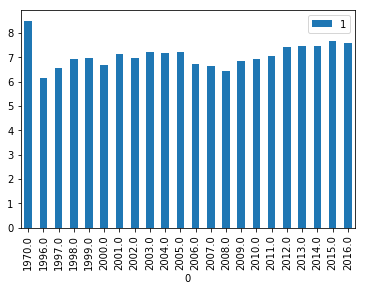

In [44]:
# 2. Do game scores vary from year to year?

i = 1970
series_list = []
while (i < 2017):
    year_reviews = reviews[reviews['release_year'] == i]
    yearly_score = (year_reviews['score'].mean())
    if (math.isnan(yearly_score) == False):
        series = pd.Series([i, yearly_score])
        series_list.append(series)
    i += 1

yearly_scores = pd.DataFrame(series_list)

yearly_scores.plot(kind='bar',x=0,y=1)

In [77]:
# 3. What's the platform with the highest average reviews?

reduced_reviews = reviews[['platform', 'score']]
grouped_reviews = reduced_reviews.groupby('platform')
platforms = grouped_reviews['score'].agg(np.mean)

# sort series
platforms = platforms.sort_values(ascending=False)
platforms.head(10)

platform
SteamOS             8.900000
WonderSwan Color    8.600000
Pocket PC           8.500000
Macintosh           8.120988
Web Games           8.000000
Atari 5200          8.000000
Ouya                8.000000
TurboGrafx-CD       8.000000
Game Boy            7.813636
New Nintendo 3DS    7.750000
Name: score, dtype: float64

In [ ]:
# 4. Are blockbuster games released at a specific time of the year?

